In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading data#

df = pd.read_csv('/Users/bhagyashrikadam/Documents/NEU_ASSIGNMENTS/ALY6020/Final Project/threads_reviews.csv')

In [3]:
df.shape

(32910, 4)

In [4]:
print(df.dtypes)

source                object
review_description    object
rating                 int64
review_date           object
dtype: object


In [5]:
df.head(10)

source                                 review_description  rating  \
0  Google Play  Meh. Not the greatest experience on a Chromebo...       2   
1  Google Play  Pretty good for a first launch!! Its easy to u...       3   
2  Google Play  For a brand new app, it's very well optimized....       3   
3  Google Play  Great app with a lot of potential! However, th...       3   
4  Google Play  The app is good, but it needs a lot of functio...       3   
5  Google Play  Currently, it's very challenging to use. It's ...       2   
6  Google Play  I still don’t want to see content from people ...       1   
7  Google Play  Could be great if all pages loaded when you cl...       2   
8  Google Play  I'm liking the concept! There is room for impr...       3   
9  Google Play  Not bad! This is its first launch. There is st...       5   

           review_date  
0  2023-07-08 14:18:24  
1  2023-07-19 20:52:48  
2  2023-07-06 23:03:11  
3  2023-07-10 00:53:25  
4  2023-07-06 16:57:43  
5  2023-07-18 22:30:10  
6  2023-07-19 19:35:31  
7  2023-07-06 14:35:15  
8  2023-07-09 03:27:39  
9  2023-07-06 23:41:13

In [6]:
## PART1 ##

## Data Cleaning ##

# Checking the number of missing values ##
missing_values = df.isnull().sum()
print(missing_values)

source                0
review_description    0
rating                0
review_date           0
dtype: int64


In [ ]:
# Checking for duplicate rows
duplicate_rows = df.duplicated().sum()
duplicate_rows

In [8]:
df = df.drop_duplicates()


In [9]:
# Descriptive Statistics #

df.describe()

rating
count  32909.000000
mean       3.398432
std        1.751484
min        1.000000
25%        1.000000
50%        4.000000
75%        5.000000
max        5.000000

In [10]:
# Get the minimum and maximum review dates
min_date = df['review_date'].min()
max_date = df['review_date'].max()

print(f"Minimum Review Date: {min_date}")
print(f"Maximum Review Date: {max_date}")


Minimum Review Date: 2023-07-05 22:53:12
Maximum Review Date: 2023-07-25 09:42:20


In [11]:
# Convert 'review_date' column to datetime format
df['review_date'] = pd.to_datetime(df['review_date'])

# Check data types
df.dtypes

source                        object
review_description            object
rating                         int64
review_date           datetime64[ns]
dtype: object

In [12]:
# Separate the date and time from the 'review_date' column
df['review_date_new'] = df['review_date'].dt.date
df['review_time'] = df['review_date'].dt.time



In [13]:
# Display the first few rows to verify
df[['review_date', 'review_date_new', 'review_time']].head()

review_date review_date_new review_time
0 2023-07-08 14:18:24      2023-07-08    14:18:24
1 2023-07-19 20:52:48      2023-07-19    20:52:48
2 2023-07-06 23:03:11      2023-07-06    23:03:11
3 2023-07-10 00:53:25      2023-07-10    00:53:25
4 2023-07-06 16:57:43      2023-07-06    16:57:43

In [14]:
# Drop the original 'review_date' column
df = df.drop(columns=['review_date'])

df.head(2)

source                                 review_description  rating  \
0  Google Play  Meh. Not the greatest experience on a Chromebo...       2   
1  Google Play  Pretty good for a first launch!! Its easy to u...       3   

  review_date_new review_time  
0      2023-07-08    14:18:24  
1      2023-07-19    20:52:48

In [15]:
# Create a new 'day' column using the 'review_date' column
df['day'] = pd.to_datetime(df['review_date_new']).dt.day_name()

df.head(10)

source                                 review_description  rating  \
0  Google Play  Meh. Not the greatest experience on a Chromebo...       2   
1  Google Play  Pretty good for a first launch!! Its easy to u...       3   
2  Google Play  For a brand new app, it's very well optimized....       3   
3  Google Play  Great app with a lot of potential! However, th...       3   
4  Google Play  The app is good, but it needs a lot of functio...       3   
5  Google Play  Currently, it's very challenging to use. It's ...       2   
6  Google Play  I still don’t want to see content from people ...       1   
7  Google Play  Could be great if all pages loaded when you cl...       2   
8  Google Play  I'm liking the concept! There is room for impr...       3   
9  Google Play  Not bad! This is its first launch. There is st...       5   

  review_date_new review_time        day  
0      2023-07-08    14:18:24   Saturday  
1      2023-07-19    20:52:48  Wednesday  
2      2023-07-06    23:03:11   Thursday  
3      2023-07-10    00:53:25     Monday  
4      2023-07-06    16:57:43   Thursday  
5      2023-07-18    22:30:10    Tuesday  
6      2023-07-19    19:35:31  Wednesday  
7      2023-07-06    14:35:15   Thursday  
8      2023-07-09    03:27:39     Sunday  
9      2023-07-06    23:41:13   Thursday

In [16]:
# Check data types
df.dtypes

source                object
review_description    object
rating                 int64
review_date_new       object
review_time           object
day                   object
dtype: object

In [17]:
# Convert 'review_date_new' to datetime datatype
df['review_date_new'] = pd.to_datetime(df['review_date_new'])

# Convert 'review_time' to datetime and then extract the time component
df['review_time'] = pd.to_datetime(df['review_time'], format='%H:%M:%S').dt.time

# Create a new column 'hour' based on the 'review_time' column
def get_part_of_day(time):
    if 5 <= time.hour < 12:
        return 'morning'
    elif 12 <= time.hour < 17:
        return 'afternoon'
    elif 17 <= time.hour < 21:
        return 'evening'
    else:
        return 'night'

df['hour'] = df['review_time'].apply(get_part_of_day)


In [18]:
categorical_columns = df.select_dtypes(include=['object']).columns
num_categorical = len(categorical_columns)
print(num_categorical)

5


In [19]:
numerical_columns = df.select_dtypes(exclude=['object']).columns
num_numerical = len(numerical_columns)
print(num_numerical)

2


In [23]:
df.head(2)


source                                 review_description  rating  \
0  Google Play  Meh. Not the greatest experience on a Chromebo...       2   
1  Google Play  Pretty good for a first launch!! Its easy to u...       3   

  review_date_new review_time        day       hour  
0      2023-07-08    14:18:24   Saturday  afternoon  
1      2023-07-19    20:52:48  Wednesday    evening

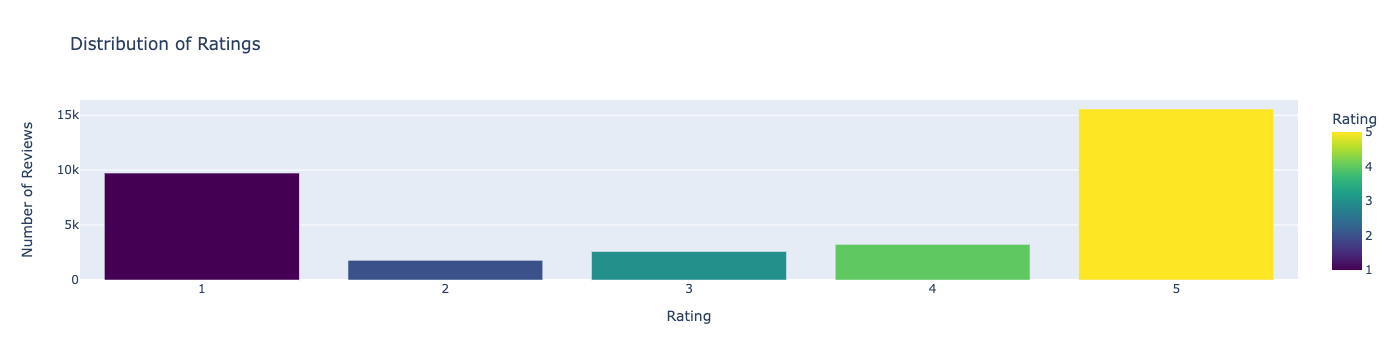

In [25]:
## EDA ##

# Bar-plot for different ratings #
import plotly.express as px

# Interactive bar plot for distribution of ratings
rating_counts = df['rating'].value_counts().reset_index()
rating_counts.columns = ['Rating', 'Count']

fig_bar_ratings = px.bar(rating_counts, x='Rating', y='Count', title='Distribution of Ratings',
                         labels={'Rating': 'Rating', 'Count': 'Number of Reviews'},
                         color='Rating', color_continuous_scale='Viridis')
fig_bar_ratings.show()

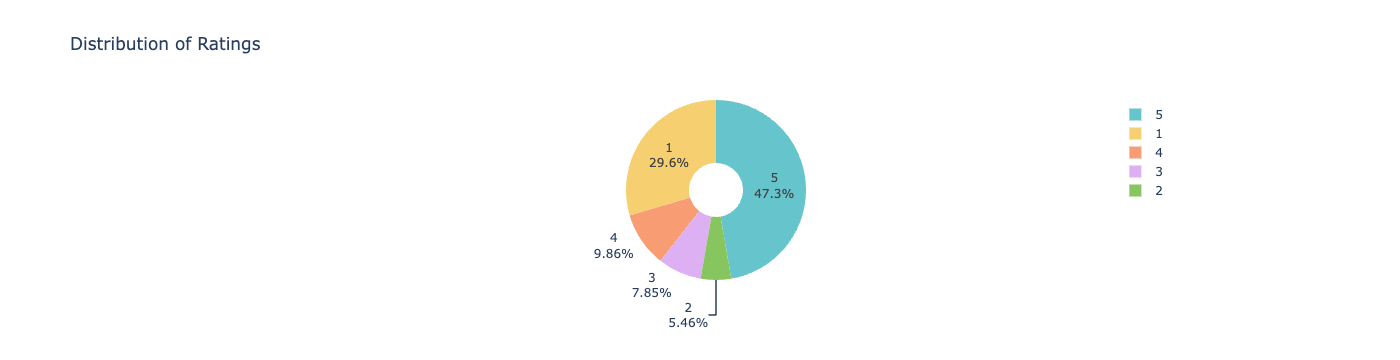

In [26]:
# Pie-chart distribution of ratings
rating_distribution = df['rating'].value_counts().reset_index()
rating_distribution.columns = ['Rating', 'Count']

# Create an interactive pie chart for rating distribution
fig_pie_rating = px.pie(rating_distribution, names='Rating', values='Count', title='Distribution of Ratings',
                        hole=0.3, labels={'Rating':'Rating'}, color_discrete_sequence=px.colors.qualitative.Pastel)
fig_pie_rating.update_traces(textinfo='percent+label')
fig_pie_rating.show()

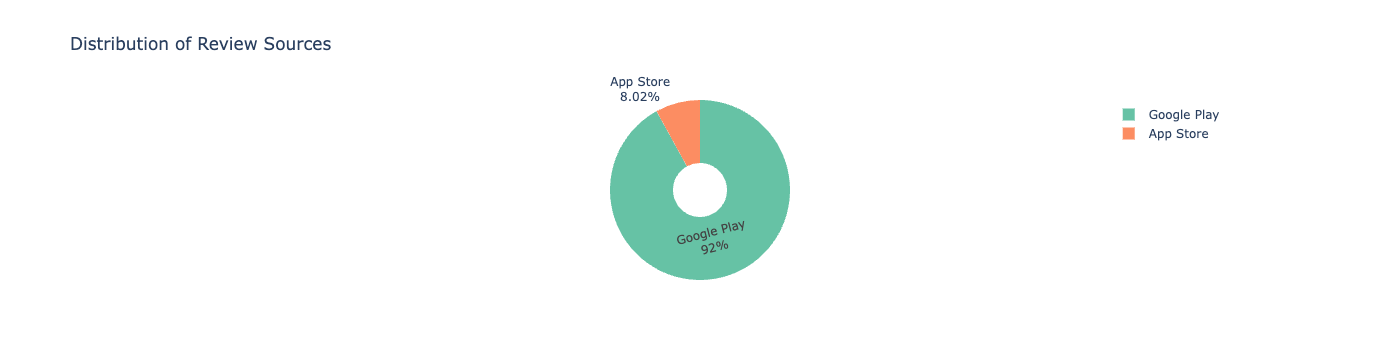

In [27]:
# Interactive donut-chart for distribution of review sources

source_distribution = df['source'].value_counts().reset_index()
source_distribution.columns = ['Source', 'Count']

# Create an interactive pie chart
fig_pie_source = px.pie(source_distribution, names='Source', values='Count', title='Distribution of Review Sources',
                        hole=0.3, labels={'Source':'Review Source'}, color_discrete_sequence=px.colors.qualitative.Set2)
fig_pie_source.update_traces(textinfo='percent+label')
fig_pie_source.show()

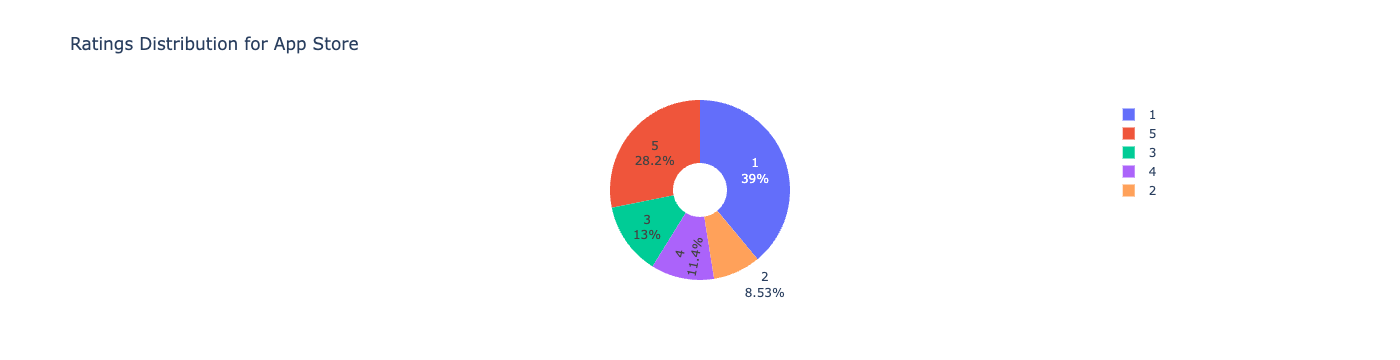

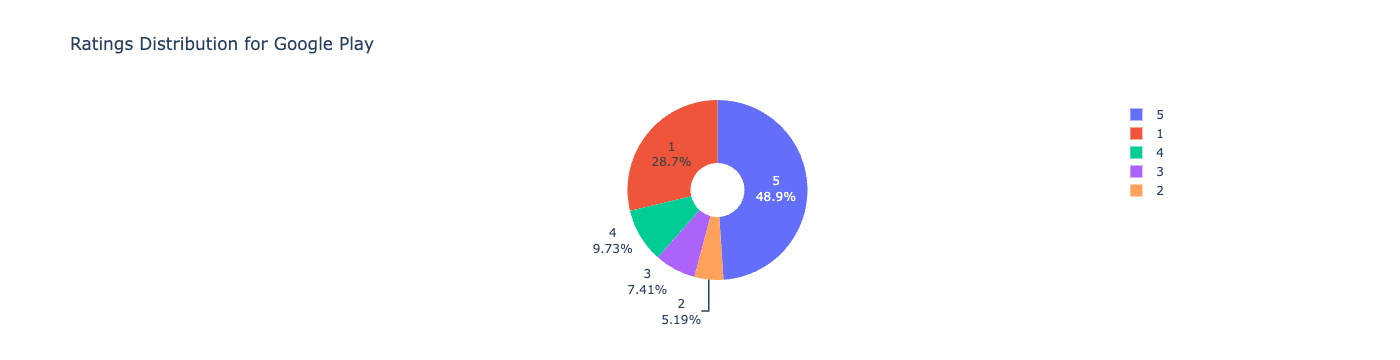

In [28]:
# Interactive donut-chart for distribution of review sources per Ratings

import plotly.express as px

# Grouping by source and rating to get the count of each rating for both sources
grouped_data = df.groupby(['source', 'rating']).size().reset_index(name='count')

# Creating pie chart for each source
figs = []
for source_name in grouped_data['source'].unique():
    source_data = grouped_data[grouped_data['source'] == source_name]
    fig = px.pie(source_data, names='rating', values='count', title=f'Ratings Distribution for {source_name}', hole=0.3)
    fig.update_traces(textinfo='percent+label')
    figs.append(fig)

# Displaying the pie charts
for fig in figs:
    fig.show()

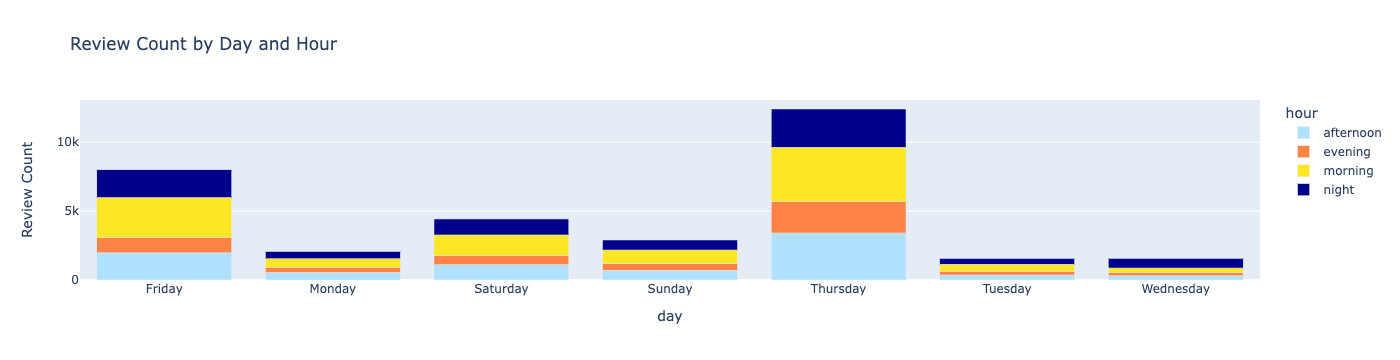

In [29]:
import plotly.express as px

# Grouping by day and hour to get the count of reviews for each combination
grouped_data = df.groupby(['day', 'hour']).size().reset_index(name='count')

# Creating an interactive bar plot
fig = px.bar(grouped_data, x='day', y='count', color='hour', 
             title='Review Count by Day and Hour',
             labels={'count': 'Review Count'},
             color_discrete_sequence=["#B0E2FF", "#FF8247", "#FDE725", "#00008B"])

# Display the plot
fig.show()


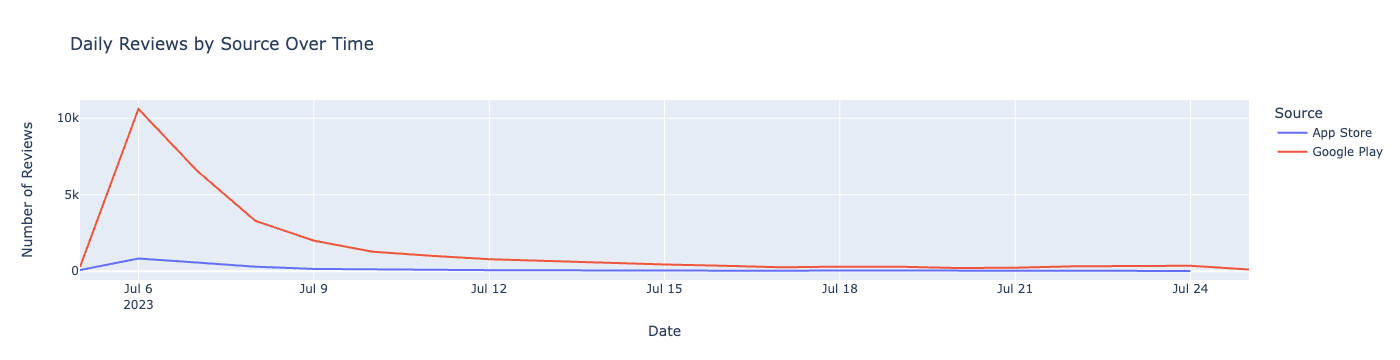

In [30]:
# Daily reviews by review source #

daily_reviews_by_source = df.groupby([df['review_date_new'].dt.date, 'source']).size().reset_index()
daily_reviews_by_source.columns = ['Date', 'Source', 'Number of Reviews']

# Interactive time series plot for daily reviews by source
fig_daily_reviews_source = px.line(daily_reviews_by_source, x='Date', y='Number of Reviews', color='Source',
                                   title='Daily Reviews by Source Over Time',
                                   labels={'Number of Reviews': 'Number of Reviews', 'Date': 'Date'})
fig_daily_reviews_source.show()

In [31]:
!pip install -q wordcloud

In [ ]:
from wordcloud import WordCloud

# Generate word cloud for review_description
text = ' '.join(df['review_description'])
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Review Descriptions')
plt.show()

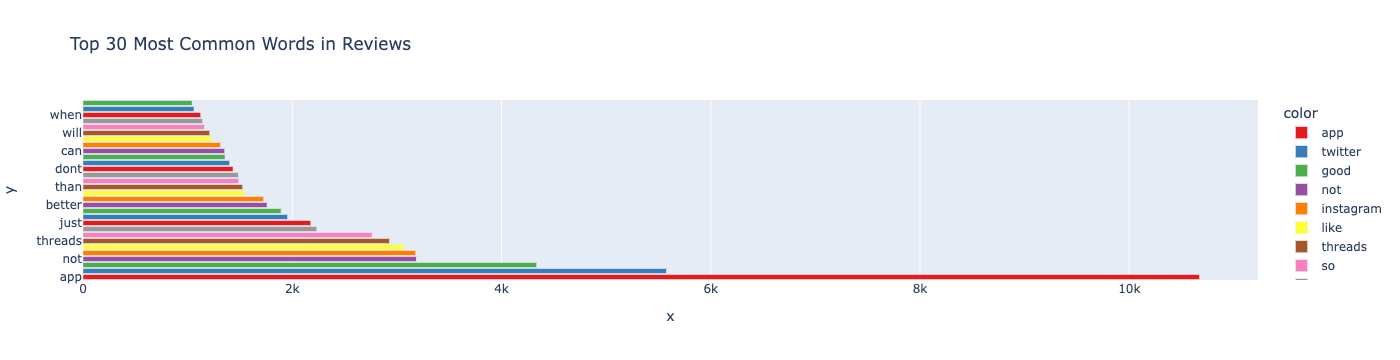

In [32]:
## Top 30 words used in Reviews ## 

from collections import Counter
import plotly.express as px
import string

# Simple tokenizer without using nltk
def simple_tokenizer(text):
    # Convert to lower case and remove punctuation
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    # Split the text into words
    words = text.split()
    # Remove stopwords
    stop_words = set(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once'])
    words = [word for word in words if word not in stop_words]
    return words

reviews = ' '.join(df['review_description'])
tokenized_reviews = simple_tokenizer(reviews)
word_freq = Counter(tokenized_reviews)

# Extracting the top 30 words and their counts
top_words = word_freq.most_common(30)
word_names = [word[0] for word in top_words]
word_values = [word[1] for word in top_words]

# Define a custom color palette
color_palette = px.colors.qualitative.Set1

# Creating an interactive horizontal bar plot with the custom color palette
fig = px.bar(x=word_values, y=word_names, orientation='h', title='Top 30 Most Common Words in Reviews', color=word_names, color_discrete_sequence=color_palette)
fig.show()

In [33]:
!pip install -q joypy

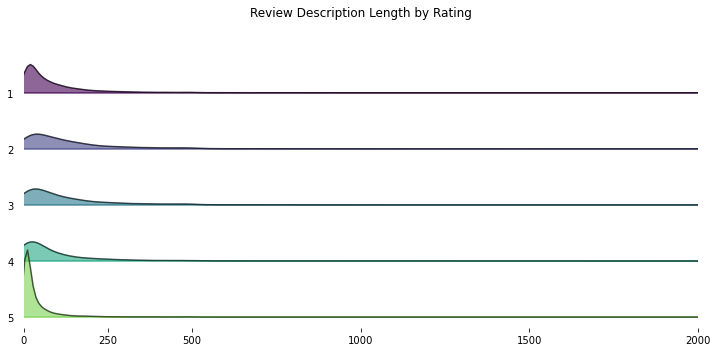

In [34]:
## Ridge Chart - Review text length by Rating ##
import joypy
import matplotlib.pyplot as plt

# Assuming 'review_text' is the column containing the review descriptions
df['text_length'] = df['review_description'].str.len()

# Create the ridge plot with a larger size
fig, ax = joypy.joyplot(
    df, 
    by='rating',
    column='text_length',
    figsize=(10, 5),  # Adjusted size
    title='Review Description Length by Rating',
    colormap=plt.cm.viridis,
    alpha=0.6,
    overlap=0.5
)

# Set x-axis limits and custom tick marks
for axis in ax:
    axis.set_xlim(0, 2000)  # Adjusted x-axis limits
    axis.set_xticks([0, 250, 500, 1000, 1500, 2000])  # Custom tick marks

plt.show()



In [35]:
#clubbing  rating 1 and 2 as '-1' , 3 as '0' and 4,5 as '1'

df['rating'] = df['rating'].map({1:-1, 2:-1, 3:0, 4:1, 5:1})


 1    18802
-1    11522
 0     2585
Name: rating, dtype: int64


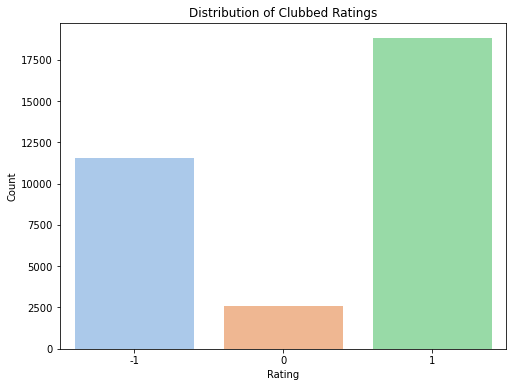

In [36]:
# Getting the value counts
rating_counts = df['rating'].value_counts()
print(rating_counts)

# Visualizing the distribution using a bar plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="pastel")
plt.title('Distribution of Clubbed Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


In [37]:
## Text Pre-Processing ##

import re

# Define a basic list of stopwords
basic_stopwords = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves",
    "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their",
    "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was",
    "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and",
    "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between",
    "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off",
    "over", "under", "again", "further", "then", "once"
])

# Define a function for text pre-processing
def preprocess_text_simple(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove emojis
    text = text.encode('ascii', 'ignore').decode('ascii')
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenization
    tokens = text.split()
    # Remove stopwords
    tokens = [token for token in tokens if token not in basic_stopwords]
    return ' '.join(tokens)

# Apply the pre-processing function to the 'review_description' column
df['processed_description'] = df['review_description'].apply(preprocess_text_simple)

# Display the first few rows to verify
df[['review_description', 'processed_description']].head()


review_description  \
0  Meh. Not the greatest experience on a Chromebo...   
1  Pretty good for a first launch!! Its easy to u...   
2  For a brand new app, it's very well optimized....   
3  Great app with a lot of potential! However, th...   
4  The app is good, but it needs a lot of functio...   

                               processed_description  
0  meh not greatest experience chromebook seems c...  
1  pretty good first launch easy use selfexplanat...  
2  brand new app very well optimized however just...  
3  great app lot potential however there lot need...  
4  app good needs lot functionality example when ...

In [38]:
## Top 20 Frequent words in Reviews ##

from collections import Counter

# Combine all the preprocessed reviews into a single string
all_reviews = ' '.join(df['processed_description'])

# Tokenize the combined string to get individual words
tokens = all_reviews.split()

# Count the frequency of each word
word_freq = Counter(tokens)

# Display the top 20 most frequent words
top_20_words = word_freq.most_common(20)
top_20_words


[('app', 10832),
 ('twitter', 5669),
 ('good', 4381),
 ('instagram', 3200),
 ('not', 3185),
 ('like', 3076),
 ('threads', 2974),
 ('so', 2766),
 ('nice', 2265),
 ('just', 2180),
 ('very', 1955),
 ('dont', 1945),
 ('account', 1902),
 ('better', 1770),
 ('no', 1745),
 ('cant', 1730),
 ('see', 1543),
 ('than', 1526),
 ('people', 1489),
 ('use', 1404)]

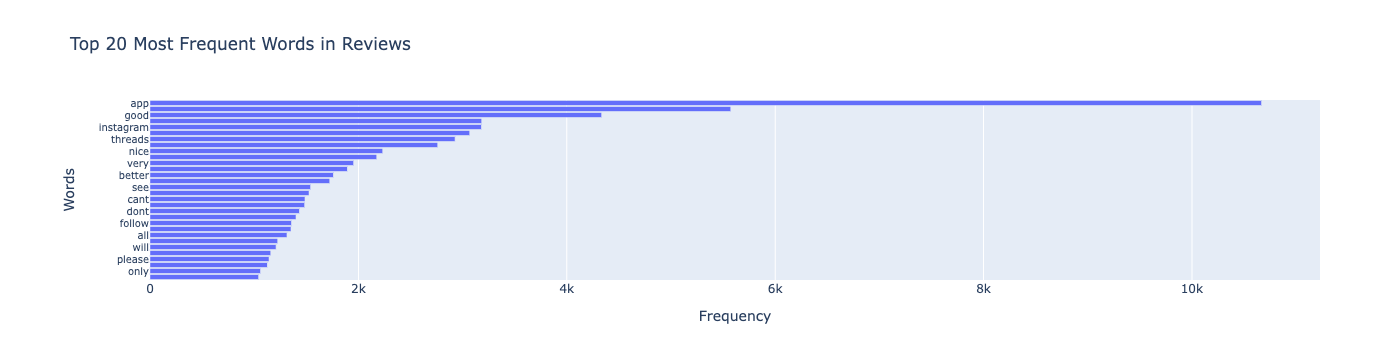

In [39]:
## Horizontal Barplot - Top 20 Frequent words in Reviews ##

import plotly.graph_objects as go

# Create the bar plot
fig = go.Figure(data=[
    go.Bar(x=word_values, y=word_names, orientation='h')
])

# Update the layout settings
fig.update_layout(
    title='Top 20 Most Frequent Words in Reviews',
    xaxis_title='Frequency',
    yaxis_title='Words',
    yaxis=dict(autorange="reversed", tickfont=dict(size=10)),
    margin=dict(l=150)  # Adjust left margin to make sure all y-axis labels fit
)

fig.show()


In [ ]:
## Word Cloud for each of the ratings ##

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and display word cloud
def generate_wordcloud(data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(data)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Filter and generate word cloud for rating -1
negative_reviews = ' '.join(df[df['rating'] == -1]['processed_description'])
generate_wordcloud(negative_reviews, 'Word Cloud for Rating -1')

# Filter and generate word cloud for rating 0
neutral_reviews = ' '.join(df[df['rating'] == 0]['processed_description'])
generate_wordcloud(neutral_reviews, 'Word Cloud for Rating 0')

# Filter and generate word cloud for rating 1
positive_reviews = ' '.join(df[df['rating'] == 1]['processed_description'])
generate_wordcloud(positive_reviews, 'Word Cloud for Rating 1')



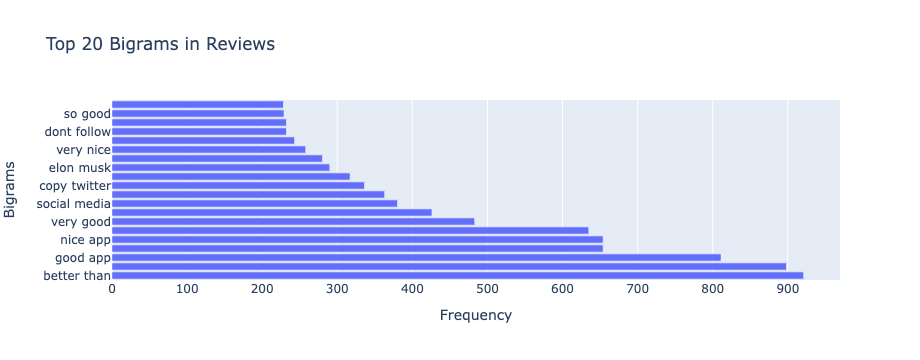

In [35]:
## Top 20 Bigrams ##

from sklearn.feature_extraction.text import CountVectorizer

# Function to get top n-grams
def get_top_ngrams(corpus, ngram_range, top_n):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:top_n]

# Get top 20 bigrams
top_bigrams = get_top_ngrams(df['processed_description'], ngram_range=(2, 2), top_n=20)

# Extracting the bigram names and their values for plotting
bigram_names = [bigram[0] for bigram in top_bigrams]
bigram_values = [bigram[1] for bigram in top_bigrams]

# Using plotly express to create the bar plot
fig_bigrams = px.bar(x=bigram_values, y=bigram_names, orientation='h', title='Top 20 Bigrams in Reviews', labels={'x': 'Frequency', 'y': 'Bigrams'})
fig_bigrams.show()


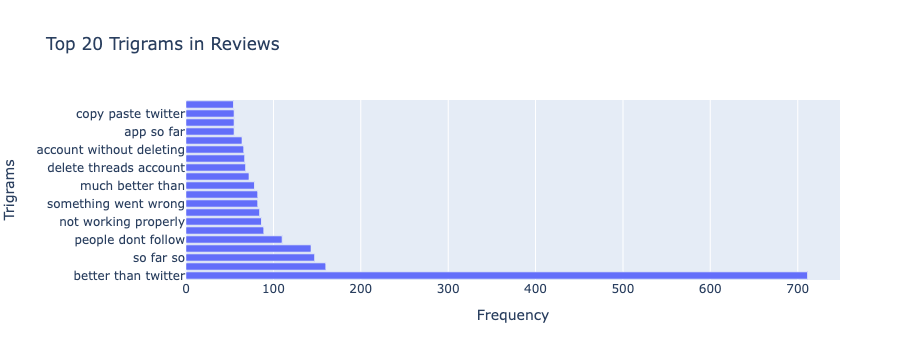

In [36]:
# Get top 20 trigrams
top_trigrams = get_top_ngrams(df['processed_description'], ngram_range=(3, 3), top_n=20)

# Extracting the trigram names and their values for plotting
trigram_names = [trigram[0] for trigram in top_trigrams]
trigram_values = [trigram[1] for trigram in top_trigrams]

# Using plotly express to create the bar plot
fig_trigrams = px.bar(x=trigram_values, y=trigram_names, orientation='h', title='Top 20 Trigrams in Reviews', labels={'x': 'Frequency', 'y': 'Trigrams'})
fig_trigrams.show()


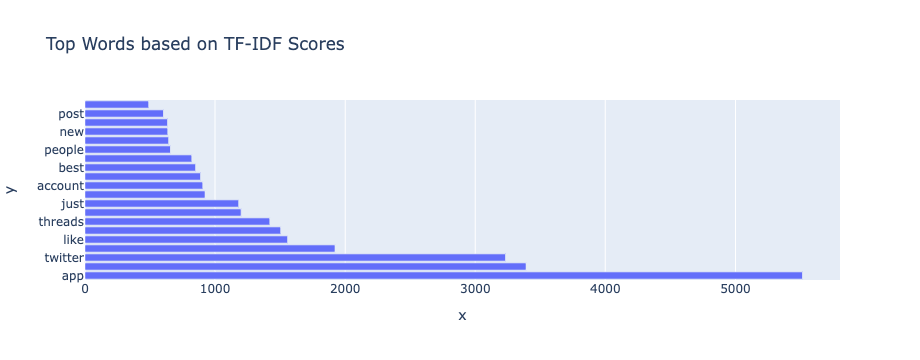

In [37]:
## TF-IDF Vectorization ##
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.85, max_features=20, stop_words='english')

# Fit and transform the processed descriptions to get the TF-IDF values
tfidf_values = tfidf_vectorizer.fit_transform(df['processed_description'])

# Extract the feature names and their corresponding TF-IDF scores
tfidf_scores = sorted(list(zip(tfidf_vectorizer.get_feature_names_out(), tfidf_values.sum(axis=0).getA1())), key=lambda x: x[1], reverse=True)

# Extracting the word names and their tf-idf scores for plotting
tfidf_words = [word[0] for word in tfidf_scores]
tfidf_scores_values = [word[1] for word in tfidf_scores]

# Using plotly express to create the bar plot
fig_tfidf = px.bar(x=tfidf_scores_values, y=tfidf_words, orientation='h', title='Top Words based on TF-IDF Scores')
fig_tfidf.show()


In [38]:
!pip install imbalanced-learn


In [39]:
## RANDOM FOREST ##

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE


# Splitting the data into features (X) and target (y)
X = df['review_description']
y = df['rating']

# Convert the text data into TF-IDF representation
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((26327, 5000), (6582, 5000))

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict the ratings on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", class_report)


Accuracy: 78.55%

Classification Report:
               precision    recall  f1-score   support

          -1       0.74      0.76      0.75      2300
           0       0.31      0.02      0.04       480
           1       0.82      0.90      0.86      3802

    accuracy                           0.79      6582
   macro avg       0.62      0.56      0.55      6582
weighted avg       0.75      0.79      0.76      6582



In [61]:
## RANDOM FOREST - WITH SMOTE ##

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


# Convert the text data into TF-IDF representation
##tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
##X_tfidf = tfidf_vectorizer.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the Random Forest classifier
rf_classifier1 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the SMOTE-augmented data
rf_classifier1.fit(X_train_smote, y_train_smote)

# Predict the ratings on the testing data
y_pred1 = rf_classifier1.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred1)
class_report = classification_report(y_test, y_pred1)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", class_report)


Accuracy: 74.73%

Classification Report:
               precision    recall  f1-score   support

          -1       0.73      0.74      0.74      2300
           0       0.21      0.25      0.23       480
           1       0.84      0.81      0.83      3802

    accuracy                           0.75      6582
   macro avg       0.59      0.60      0.60      6582
weighted avg       0.76      0.75      0.75      6582



In [43]:
## Hyperparamter Tuning(not required) ##

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Initialize the grid search with 5-fold cross-validation
grid_search_rf = GridSearchCV(estimator=rf_classifier1, param_grid=param_grid_rf, 
                              cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search_rf.fit(X_train_smote, y_train_smote)

# Print the best parameters
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [46]:
##  (not required) ##

# Train the Random Forest model with the best parameters
best_rf = RandomForestClassifier(max_depth=None, min_samples_leaf=1, 
                                 min_samples_split=2, n_estimators=150)

best_rf.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate the model's performance
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Accuracy (Best Random Forest): {accuracy_best_rf*100:.2f}%")


print("\nClassification Report (Best Random Forest):")
print(classification_report(y_test, y_pred_best_rf))


Accuracy (Best Random Forest): 74.89%

Classification Report (Best Random Forest):
              precision    recall  f1-score   support

          -1       0.74      0.74      0.74      2300
           0       0.20      0.24      0.22       480
           1       0.84      0.82      0.83      3802

    accuracy                           0.75      6582
   macro avg       0.59      0.60      0.59      6582
weighted avg       0.76      0.75      0.75      6582



In [47]:
## Gradient Boosting - SMOTE ##

from sklearn.ensemble import GradientBoostingClassifier


# Gradient Boosting with SMOTE
gbm_smote = GradientBoostingClassifier()
gbm_smote.fit(X_train_smote, y_train_smote)
y_pred_gbm_smote = gbm_smote.predict(X_test)

print("Gradient Boosting Model Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_gbm_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gbm_smote))




Gradient Boosting Model Results:
Accuracy: 0.6317228805834093

Classification Report:
               precision    recall  f1-score   support

          -1       0.55      0.79      0.65      2300
           0       0.21      0.36      0.27       480
           1       0.90      0.57      0.69      3802

    accuracy                           0.63      6582
   macro avg       0.55      0.58      0.54      6582
weighted avg       0.72      0.63      0.65      6582



In [48]:
## SVM Model with SMOTE ##

from sklearn.svm import SVC

# SVM with SMOTE
svm_smote = SVC()
svm_smote.fit(X_train_smote, y_train_smote)
y_pred_svm_smote = svm_smote.predict(X_test)

print("SVM Model Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm_smote))


SVM Model Results:
Accuracy: 0.7417198419933151

Classification Report:
               precision    recall  f1-score   support

          -1       0.76      0.78      0.77      2300
           0       0.10      0.13      0.11       480
           1       0.84      0.80      0.82      3802

    accuracy                           0.74      6582
   macro avg       0.57      0.57      0.57      6582
weighted avg       0.76      0.74      0.75      6582



In [ ]:
## SVM with linear model ##

from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize the LinearSVC model
linear_svm = LinearSVC(class_weight='balanced', random_state=42)

# Train the model on the SMOTE-augmented data
linear_svm.fit(X_train_smote, y_train_smote)

# Predict on the test data
y_pred_linear_svm = linear_svm.predict(X_test)

# Evaluate the model's performance
print("Linear SVM with SMOTE Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_linear_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_linear_svm))


In [62]:
## MODEL COMPARISON ##

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Define a function to compute metrics
def compute_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Compute metrics for each model
rf_metrics = compute_metrics(y_test, y_pred1)
svm_metrics = compute_metrics(y_test, y_pred_svm_smote)
gbm_metrics = compute_metrics(y_test, y_pred_gbm_smote)

# Tabulate results
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Random Forest': rf_metrics,
    'SVM': svm_metrics,
    'Gradient Boosting': gbm_metrics
})

print(metrics_df)


      Metric  Random Forest       SVM  Gradient Boosting
0   Accuracy       0.747341  0.741720           0.631723
1  Precision       0.757198  0.758516           0.723494
2     Recall       0.747341  0.741720           0.631723
3   F1-Score       0.751955  0.749634           0.646867


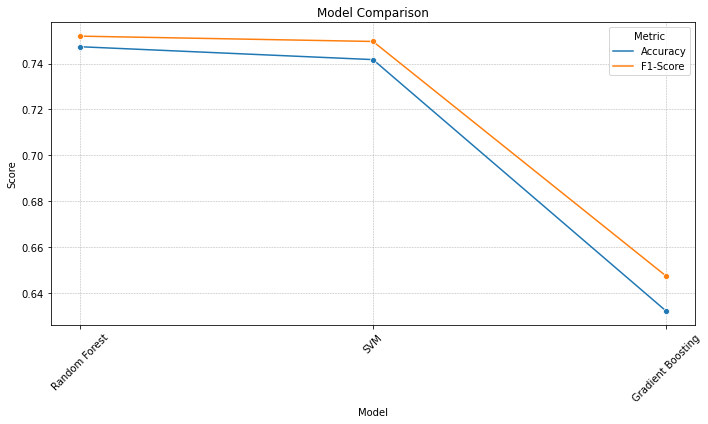

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Random Forest': [0.747341, 0.757198, 0.747341, 0.751955],
    'SVM': [0.741720, 0.758516, 0.741720, 0.749634],
    'Gradient Boosting': [0.632027, 0.723015, 0.632027, 0.647293]
}
metrics_df = pd.DataFrame(data)

# Filter for only Accuracy and F1-Score
filtered_df = metrics_df[metrics_df['Metric'].isin(['Accuracy', 'F1-Score'])]

# Melt the dataframe for plotting
melted_df = pd.melt(filtered_df, id_vars='Metric', value_vars=['Random Forest', 'SVM', 'Gradient Boosting'])

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=melted_df, x='variable', y='value', hue='Metric', marker='o')
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [75]:
## Predicting Synthetic reviews - Positive ##

y_new = rf_classifier1.predict(tfidf_vectorizer.transform(["Optimization is very good in this App, even better than Twitter!!!"]))
if y_new == -1:
    print("Negative")
elif y_new == 0:
    print("Neutral")
elif y_new == 1:
    print("Positive")

Positive


In [76]:
## Predicting Synthetic reviews - Negative ##

y_new = rf_classifier1.predict(tfidf_vectorizer.transform(["Come on Mark! Could you stop mimicking Elon??"]))

if y_new == -1:
    print("Negative")
elif y_new == 0:
    print("Neutral")
elif y_new == 1:
    print("Positive")


Negative


In [77]:
## Predicting Synthetic reviews - Neutral ##

y_new = rf_classifier1.predict(tfidf_vectorizer.transform(["Threads is a standard app.It does its job, but there's room for improvement."]))
if y_new == -1:
    print("Negative")
elif y_new == 0:
    print("Neutral")
elif y_new == 1:
    print("Positive")


Neutral


In [67]:
## EXTRA ##
from sklearn.neural_network import MLPClassifier

# Initialize the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=200, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.1)

# Fit the model to training data
mlp.fit(X_train_smote, y_train_smote)

# Predict on test data
y_pred_mlp = mlp.predict(X_test)

# Calculate accuracy
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Neural Network Accuracy: {accuracy_mlp * 100:.2f}%")


Iteration 1, loss = 0.89785477
Iteration 2, loss = 0.75261149
Iteration 3, loss = 0.70238089
Iteration 4, loss = 0.66983460
Iteration 5, loss = 0.64909787
Iteration 6, loss = 0.63664292
Iteration 7, loss = 0.60679879
Iteration 8, loss = 0.60653611
Iteration 9, loss = 0.56225189
Iteration 10, loss = 0.55963803
Iteration 11, loss = 0.61354240
Iteration 12, loss = 0.52867532
Iteration 13, loss = 0.51355854
Iteration 14, loss = 0.47199536
Iteration 15, loss = 0.48771913
Iteration 16, loss = 0.45024559
Iteration 17, loss = 0.44519461
Iteration 18, loss = 0.48887108
Iteration 19, loss = 0.48247228
Iteration 20, loss = 0.50087182
Iteration 21, loss = 0.43665296
Iteration 22, loss = 0.41318359
Iteration 23, loss = 0.40627747
Iteration 24, loss = 0.39279747
Iteration 25, loss = 0.36134624
Iteration 26, loss = 0.47796928
Iteration 27, loss = 0.45374130
Iteration 28, loss = 0.39797588
Iteration 29, loss = 0.37127823
Iteration 30, loss = 0.39289335
Iteration 31, loss = 0.41778190
Iteration 32, los

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_mlp))
